In [1]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import os
import seaborn as sns

In [2]:
p='/content/drive/MyDrive/DeepEye/IDRid/Training Set'

In [3]:
df=pd.read_csv('/content/drive/MyDrive/DeepEye/IDRid/Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv')
df.head()

,Image name,Retinopathy grade,Risk of macular edema,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,IDRiD_001,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IDRiD_002,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IDRiD_003,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IDRiD_004,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDRiD_005,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from tensorflow import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
img1.shape

(2848, 4288)

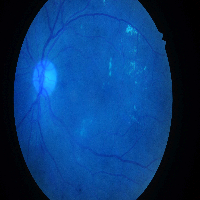

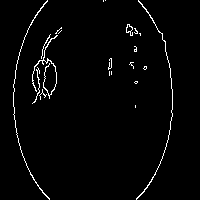

In [ ]:
img=cv2.imread('/content/drive/MyDrive/DeepEye/IDRid/Training Set/IDRiD_002.jpg')
img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
#img=cv2.GaussianBlur(img,(5,5),0.1)
img=cv2.resize(img,(200,200))
cv2_imshow(img)
print()
imgq=cv2.Canny(img,200,100)

#img=cv2.flip(img,1)
cv2_imshow(imgq)

In [ ]:
imag=cv2.bitwise_not(img,img1)


In [ ]:
stack=np.hstack((imag,img))

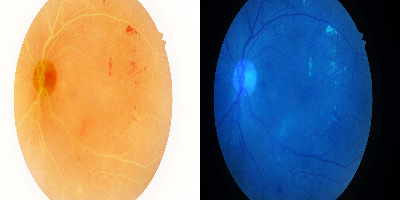

In [ ]:
cv2_imshow(stack)

In [ ]:
sns.heatmap(img1)

NameError: ignored

In [ ]:
x=df.dropna(axis=1)
x

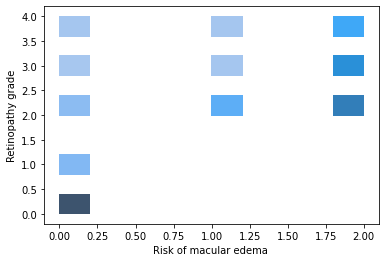

In [ ]:
sns.histplot(x,y=df['Retinopathy grade'],x=df['Risk of macular edema '])

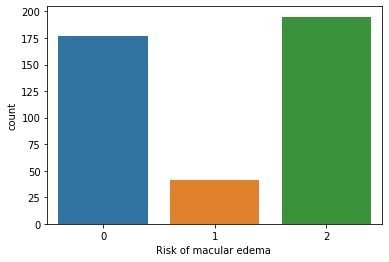

In [ ]:

sns.countplot(data=x,x=df['Risk of macular edema '])

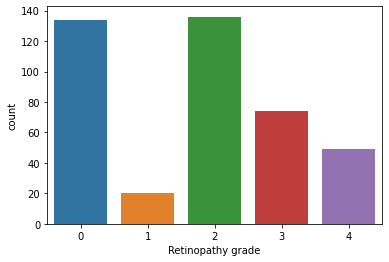

In [ ]:
sns.countplot(data=x,x=df['Retinopathy grade'])

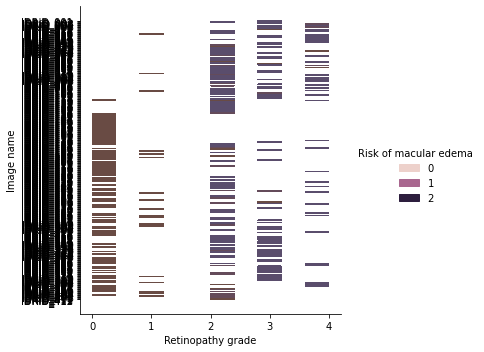

In [ ]:
sns.displot(x,y=df['Image name'],x=df['Retinopathy grade'],hue=df['Risk of macular edema '])

In [ ]:
df.groupby('Risk of macular edema ').count()

,Image name,Retinopathy grade,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
Risk of macular edema,,,,,,,,,,,
0,177,177,0,0,0,0,0,0,0,0,0
1,41,41,0,0,0,0,0,0,0,0,1
2,195,195,0,0,0,0,0,0,0,0,0


In [16]:
size=300

In [17]:
train=[]
label=[]
for i in (os.listdir(p)):
  name=i.split('.')[0]
  img=cv2.imread(p+'/'+i)
  #img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  img=cv2.resize(img,(size,size))
  l=df[df['Image name']== name]['Risk of macular edema '].values[0]
  train.append(img)
  label.append(l)


In [18]:
labels = np.array(label)
Y = np_utils.to_categorical(labels, 3)

img_data = np.array(train)
img_data = img_data.astype('float32')
img_data /= 255


In [19]:
train=img_data.reshape(-1,size,size,3)

In [28]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced',np.unique(labels),labels)
class_weight

array([0.77777778, 3.35772358, 0.70598291])

In [21]:
class_weights = dict(enumerate(class_weight))

In [22]:
# model=Sequential()
# model.add(Conv2D(256,(3,3),input_shape=(size,size,1)))
# #model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Conv2D(256, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Conv2D(256, (3, 3)))
# #model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(100, (3, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(50, (2, 2)))
# model.add(Activation('relu'))
# model.add(Conv2D(50, (2, 2)))
# model.add(Conv2D(50, (2, 2)))
# model.add(Conv2D(50, (2, 2)))
# model.add(Conv2D(50, (2, 2)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(1000))
# model.add(Activation('relu'))
# model.add(Dense(500))
# model.add(Dense(300))
# model.add(Activation('relu'))
# model.add(Dense(100))
# model.add(Activation('relu'))
# model.add(Dense(3))
# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [23]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(size,size,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)

restnet = Model(restnet.input, outputs= output)
for layer in restnet.layers:
    layer.trainable = True
#restnet.summary()

In [30]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
model = Sequential()
model.add(restnet)
model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(200))
model.add(Dropout(0.3))
model.add(Dense(50))
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])


In [33]:
hist = model.fit(train, Y,epochs=70, validation_split=0.2,batch_size=40)

Epoch 1/70
9/9 [==============================] - 12s 760ms/step - loss: 1.0077 - accuracy: 0.5606 - val_loss: 2.2530 - val_accuracy: 0.1566
Epoch 2/70
9/9 [==============================] - 7s 764ms/step - loss: 0.8663 - accuracy: 0.5515 - val_loss: 1.7036 - val_accuracy: 0.1446
Epoch 3/70
9/9 [==============================] - 7s 763ms/step - loss: 0.8627 - accuracy: 0.5636 - val_loss: 1.3387 - val_accuracy: 0.1446
Epoch 4/70
9/9 [==============================] - 7s 764ms/step - loss: 0.8568 - accuracy: 0.5545 - val_loss: 1.3661 - val_accuracy: 0.1446
Epoch 5/70
9/9 [==============================] - 7s 762ms/step - loss: 0.8797 - accuracy: 0.5515 - val_loss: 1.2909 - val_accuracy: 0.1446
Epoch 6/70
9/9 [==============================] - 7s 763ms/step - loss: 0.8635 - accuracy: 0.5455 - val_loss: 1.1458 - val_accuracy: 0.1446
Epoch 7/70
9/9 [==============================] - 7s 761ms/step - loss: 0.8491 - accuracy: 0.5545 - val_loss: 1.2595 - val_accuracy: 0.1446
Epoch 8/70
9/9 [===

In [35]:
model.save('/content/drive/MyDrive/Projects/model.h5')

In [36]:
model.save_weights('/content/drive/MyDrive/Projects/test_weights.h5')

In [37]:
train1=[]
label1=[]
for i in (os.listdir(p)):
  name=i.split('.')[0]
  img=cv2.imread(p+'/'+i)
  #img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  img=cv2.resize(img,(size,size))
  l=df[df['Image name']== name]['Retinopathy grade'].values[0]
  train1.append(img)
  label1.append(l)

In [45]:
labels1 = np.array(label1)
Y1 = np_utils.to_categorical(labels, 5)

img_data1 = np.array(train1)
img_data1 = img_data1.astype('float32')
img_data1 /= 255


In [47]:
train1=img_data1.reshape(-1,size,size,3)

In [48]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced',np.unique(labels1),labels1)
class_weight

array([0.61641791, 4.13      , 0.60735294, 1.11621622, 1.68571429])

In [49]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
model = Sequential()
model.add(restnet)
model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(200))
model.add(Dropout(0.3))
model.add(Dense(50))
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [50]:
hist = model.fit(train1, Y1,epochs=70, validation_split=0.2,batch_size=40)

Epoch 1/70
9/9 [==============================] - 12s 811ms/step - loss: 2.0545 - accuracy: 0.4996 - val_loss: 19.8143 - val_accuracy: 0.7470
Epoch 2/70
9/9 [==============================] - 6s 702ms/step - loss: 2.4573 - accuracy: 0.7323 - val_loss: 49.7950 - val_accuracy: 0.1446
Epoch 3/70
9/9 [==============================] - 6s 705ms/step - loss: 0.9695 - accuracy: 0.6707 - val_loss: 79.3942 - val_accuracy: 0.1446
Epoch 4/70
9/9 [==============================] - 6s 709ms/step - loss: 1.1055 - accuracy: 0.6906 - val_loss: 30.9181 - val_accuracy: 0.1446
Epoch 5/70
9/9 [==============================] - 6s 710ms/step - loss: 1.4968 - accuracy: 0.6421 - val_loss: 7.3962 - val_accuracy: 0.1446
Epoch 6/70
9/9 [==============================] - 6s 713ms/step - loss: 1.1340 - accuracy: 0.6501 - val_loss: 1.4150 - val_accuracy: 0.7470
Epoch 7/70
9/9 [==============================] - 6s 713ms/step - loss: 0.7820 - accuracy: 0.7272 - val_loss: 14.6600 - val_accuracy: 0.1446
Epoch 8/70
9/9